In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

<Axes: xlabel='airline_sentiment', ylabel='count'>

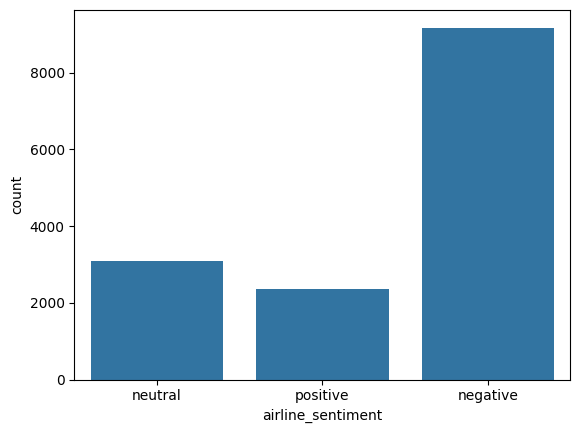

In [5]:
sns.countplot(data=df, x='airline_sentiment')

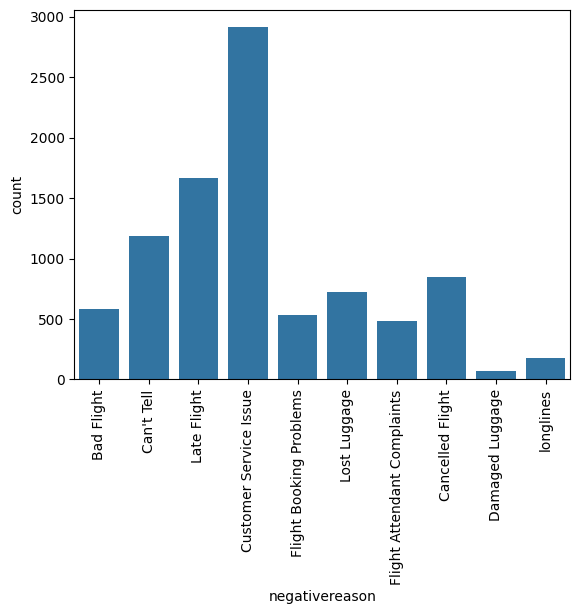

In [8]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

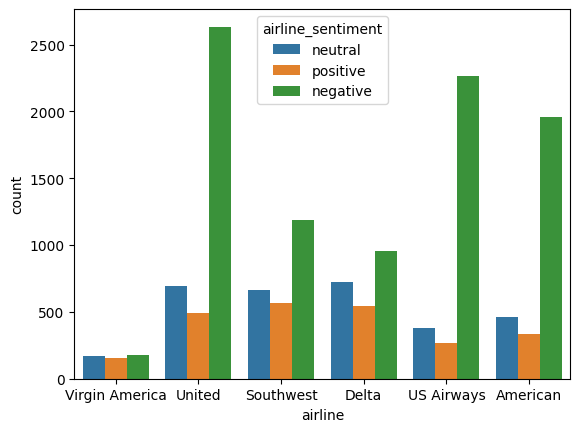

In [9]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [10]:
# Let's select two columns ['text', 'airline_sentiment']
data = df[['text','airline_sentiment']]

In [11]:
X = data['text']
y = data['airline_sentiment']

In [15]:
# Let's split the data
from sklearn.model_selection import train_test_split

# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(X_train)

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",'english'
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.

In [19]:
tfidf_X_train = tfidf.transform(X_train)
tfidf_X_test = tfidf.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
nb_model = MultinomialNB() # We can use GridSearchCV to find the best params

In [22]:
nb_model.fit(tfidf_X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [23]:
y_preds = nb_model.predict(tfidf_X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [25]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.15      0.25       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.70      2928
   macro avg       0.79      0.44      0.46      2928
weighted avg       0.74      0.70      0.62      2928



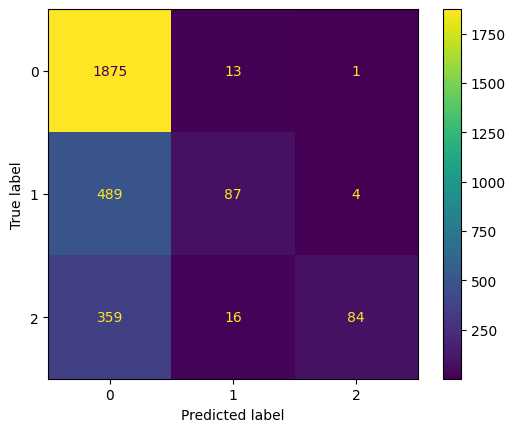

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds)).plot()